In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [6]:
data = pd.read_csv('/content/Mall_Customers.csv')
data = data.drop('CustomerID', axis=1)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


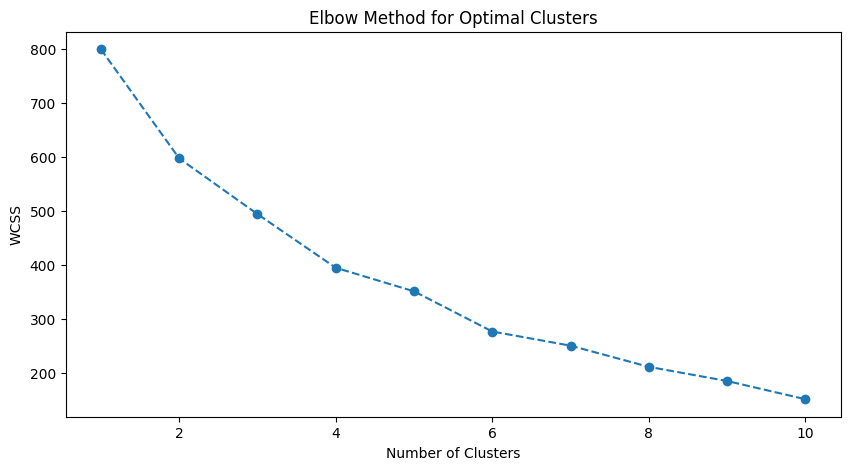

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [8]:
data['Cluster'] = clusters


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]


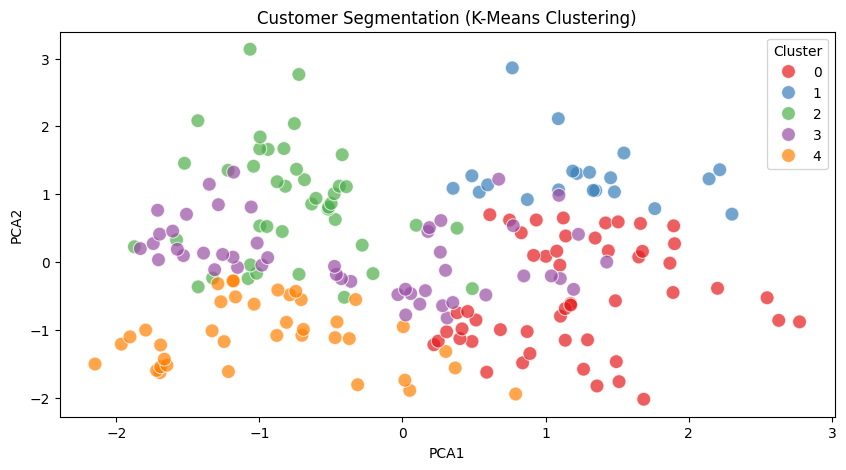

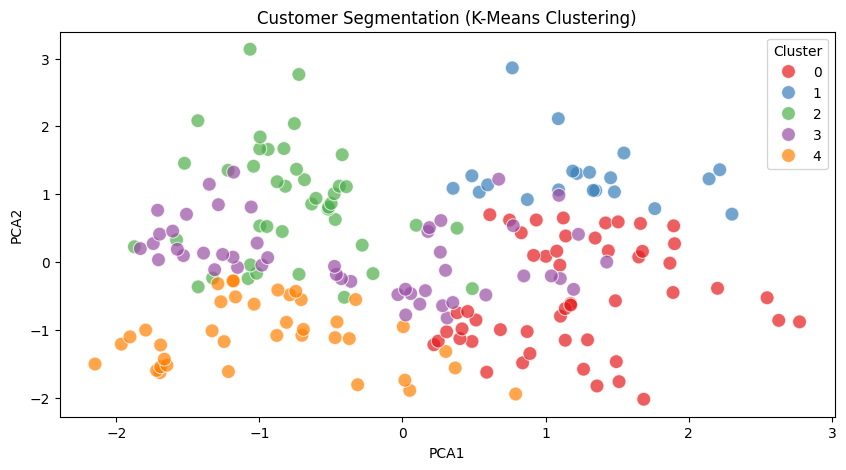

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,4
3,23,16,77,4
4,31,17,40,4


In [9]:

# Plotting the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation (K-Means Clustering)')
plt.show()

# Display the few rows
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segmentation (K-Means Clustering)')
plt.show()

# Display the rows with cluster assignment
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head()